In [109]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
data = pd.read_csv("Copper_Set.csv")
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


## Null Percentage calculation and handling Null Values

In [113]:
data.isnull().mean()*100

id                0.001101
item_date         0.000550
quantity tons     0.000000
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.000550
selling_price     0.000550
dtype: float64

In [114]:
data['material_ref']

0                                      DEQ1 S460MC
1         0000000000000000000000000000000000104991
2                                         S0380700
3                          DX51D+ZM310MAO 2.3X1317
4                                  2_S275JR+AR-CL1
                            ...                   
181668    0000000000000000000000000000000001000777
181669    0000000000000000000000000000000001000227
181670    0000000000000000000000000000000001004216
181671    0000000000000000000000000000000001001149
181672    0000000000000000000000000000000001005439
Name: material_ref, Length: 181673, dtype: object

In [115]:
# In the material_ref column, there are 42% null values and many values which started with zeros should be replaced with 
# null ( as prescribed in the ducumentation), we should drop that column. Even though that column is important, we 
# need , subject expect what we should do with the column missing. So, for now I am dropping that

data.drop('material_ref', axis=1, inplace= True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  product_ref    181673 non-null  int64  
 11  delivery date  181672 non-null  float64
 12  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 18.0+ MB


In [117]:
data.isnull().mean()*100

id               0.001101
item_date        0.000550
quantity tons    0.000000
customer         0.000550
country          0.015412
status           0.001101
item type        0.000000
application      0.013211
thickness        0.000550
width            0.000000
product_ref      0.000000
delivery date    0.000550
selling_price    0.000550
dtype: float64

In [118]:
# Dropping the null values
data.dropna(inplace=True)

In [119]:
data.isnull().mean()*100

id               0.0
item_date        0.0
quantity tons    0.0
customer         0.0
country          0.0
status           0.0
item type        0.0
application      0.0
thickness        0.0
width            0.0
product_ref      0.0
delivery date    0.0
selling_price    0.0
dtype: float64

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181636 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181636 non-null  object 
 1   item_date      181636 non-null  float64
 2   quantity tons  181636 non-null  object 
 3   customer       181636 non-null  float64
 4   country        181636 non-null  float64
 5   status         181636 non-null  object 
 6   item type      181636 non-null  object 
 7   application    181636 non-null  float64
 8   thickness      181636 non-null  float64
 9   width          181636 non-null  float64
 10  product_ref    181636 non-null  int64  
 11  delivery date  181636 non-null  float64
 12  selling_price  181636 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 19.4+ MB


## Data Type Manipulations

In [121]:
# as our date is in the format of year monthe and date - the format should be %y %m %d
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce')
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33


In [122]:
# As the 'id' column is unique identifier for every column, it is transaction id- we can remove for now
data.drop('id', axis=1, inplace=True ) 

In [123]:
# 'quantity tons' should be numeric, but it is in 'object' type. so, conver it to numeric
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors= 'coerce')

In [124]:
# `customer`: The "customer" column refers to the name or identifier of the customer who either purchased or ordered the items.
# It is unique for every row. we can remove the column for now
data.drop('customer', axis=1, inplace=True ) 

In [125]:
# 'country', 'status', 'status','application' are categorial columns, so transform them
data['country'] = data['country'].astype('category')
data['status'] = data['status'].astype('category')
data['status'] = data['status'].astype('category')
data['application'] = data['application'].astype('category')
data['item type'] = data['item type'].astype('category')

In [126]:
# 'product_ref' to be a reference or identifier for the specific product.
data['product_ref'] = data['product_ref'].astype('category')

## Encoding the categorial columns

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
data.select_dtypes('category').columns.values

array(['country', 'status', 'item type', 'application', 'product_ref'],
      dtype=object)

In [129]:
le = LabelEncoder()

for i in data.select_dtypes('category').columns.values:
    data[i] = le.fit_transform(data[i])

In [130]:
data.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,3,7,5,4,2.00,1500.0,24,2021-07-01,854.00
1,2021-04-01,768.024839,0,7,5,17,0.80,1210.0,22,2021-04-01,1047.00
2,2021-04-01,386.127949,4,7,6,12,0.38,952.0,5,2021-01-01,644.33
3,2021-04-01,202.411065,5,7,3,21,2.30,1317.0,22,2021-01-01,768.00
4,2021-04-01,785.526262,3,7,5,4,4.00,2000.0,8,2021-03-01,577.00


In [131]:
data['Trans_year'] = data['item_date'].dt.year
data['Trans_month'] = data['item_date'].dt.month
data['Trans_day'] = data['item_date'].dt.day
data['delivery_year'] = data['delivery date'].dt.year
data['delivery_month'] = data['delivery date'].dt.month
data['delivery_day'] = data['delivery date'].dt.day

In [132]:
col_datetime = ['Trans_year', 'Trans_month', 'Trans_day','delivery_year', 'delivery_month', 'delivery_day']

In [133]:
for i in col_datetime:
    data[i] = le.fit_transform(data[i])

In [134]:
# As we got the data from datetime columns, we can drop them
data.drop(['item_date', 'delivery date' ], axis=1, inplace=True)

## Statistical analysis

In [135]:
corr_data = data.corr()

In [136]:
corr_data

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,Trans_year,Trans_month,Trans_day,delivery_year,delivery_month,delivery_day
quantity tons,1.000000,-0.000737,-0.002913,-0.002440,-0.001946,-0.000640,-0.000428,-0.000476,-0.000010,-0.001969,-0.000403,-0.000312,-0.003543,0.002947,-0.000008
country,-0.000737,1.000000,0.085448,0.134260,-0.034340,-0.021380,0.050917,-0.125301,0.002641,-0.012795,0.016670,-0.053489,-0.067586,0.025708,-0.001614
status,-0.002913,0.085448,1.000000,0.242672,0.144679,-0.051770,-0.093673,-0.079828,-0.001321,0.047094,-0.005284,-0.012172,-0.021778,-0.020764,0.001716
item type,-0.002440,0.134260,0.242672,1.000000,0.190577,-0.025980,-0.092389,-0.121894,-0.005074,0.053395,-0.016073,-0.038814,-0.000398,0.007014,-0.000419
application,-0.001946,-0.034340,0.144679,0.190577,1.000000,-0.078421,-0.216634,-0.203237,0.000819,-0.011989,0.016842,-0.006844,-0.061828,0.018112,0.002656
thickness,-0.000640,-0.021380,-0.051770,-0.025980,-0.078421,1.000000,0.161644,0.097588,-0.001129,0.003209,-0.004014,-0.006721,0.012255,-0.005043,-0.000992
width,-0.000428,0.050917,-0.093673,-0.092389,-0.216634,0.161644,1.000000,0.033242,0.000584,0.021281,-0.026233,0.000566,0.009690,0.015136,-0.000574
product_ref,-0.000476,-0.125301,-0.079828,-0.121894,-0.203237,0.097588,0.033242,1.000000,0.003802,0.029426,-0.016033,-0.003809,0.075678,-0.033012,-0.003349
selling_price,-0.000010,0.002641,-0.001321,-0.005074,0.000819,-0.001129,0.000584,0.003802,1.000000,0.004471,-0.003467,0.001281,0.002563,-0.002746,-0.000009
Trans_year,-0.001969,-0.012795,0.047094,0.053395,-0.011989,0.003209,0.021281,0.029426,0.004471,1.000000,-0.882954,-0.000874,0.552754,-0.102957,0.000746


<AxesSubplot:>

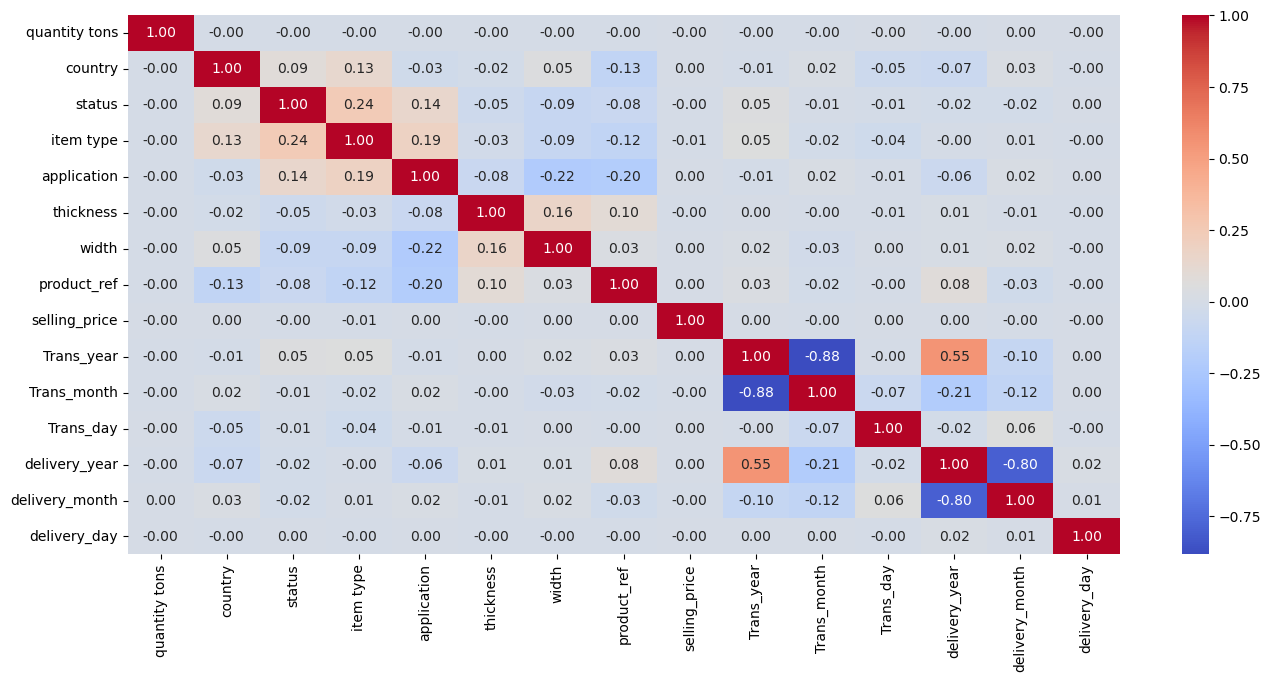

In [137]:
plt.figure(figsize=(16,7))
sns.heatmap(corr_data, annot=True, cmap= 'coolwarm', fmt='.2f')
# No values are highly correlated, so we can go ahead with out dropping column

## Distribution Check

In [138]:
data.head()

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,Trans_year,Trans_month,Trans_day,delivery_year,delivery_month,delivery_day
0,54.151139,3,7,5,4,2.00,1500.0,24,854.00,1,3,0,2,6,0
1,768.024839,0,7,5,17,0.80,1210.0,22,1047.00,1,3,0,2,3,0
2,386.127949,4,7,6,12,0.38,952.0,5,644.33,1,3,0,2,0,0
3,202.411065,5,7,3,21,2.30,1317.0,22,768.00,1,3,0,2,0,0
4,785.526262,3,7,5,4,4.00,2000.0,8,577.00,1,3,0,2,2,0


In [139]:
data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'Trans_year',
       'Trans_month', 'Trans_day', 'delivery_year', 'delivery_month',
       'delivery_day'],
      dtype='object')

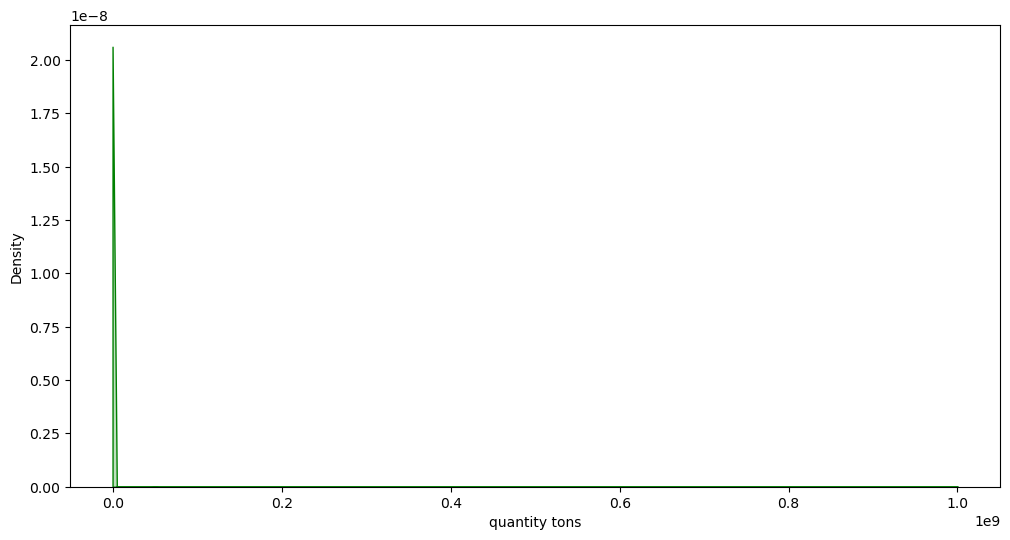

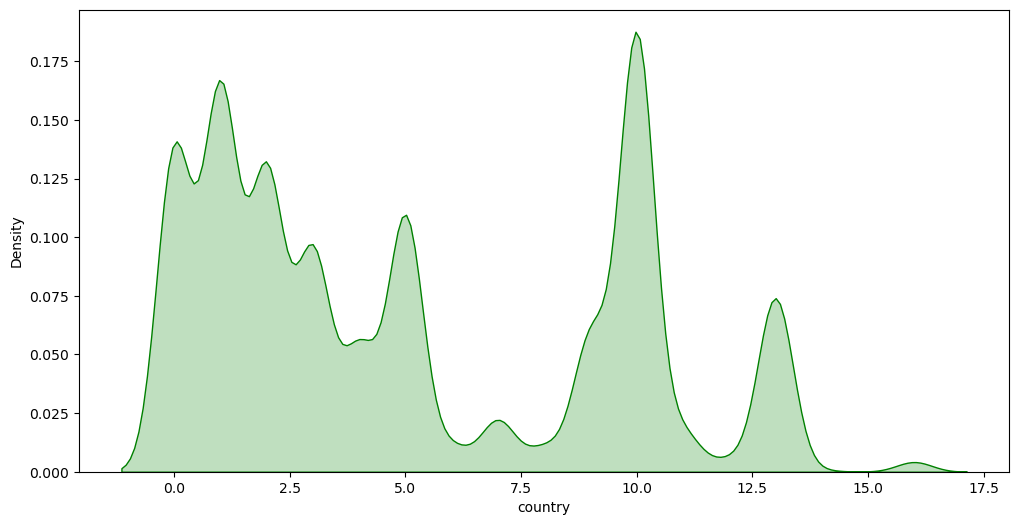

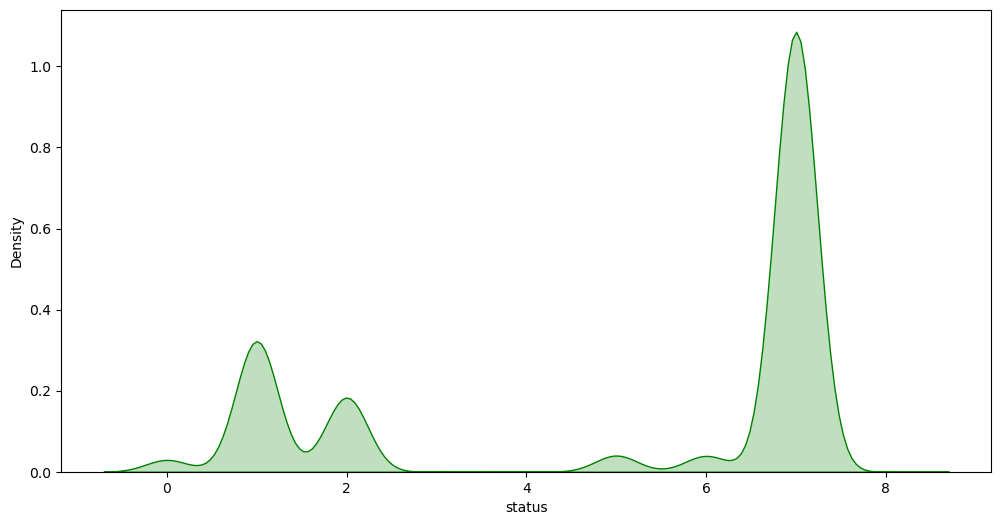

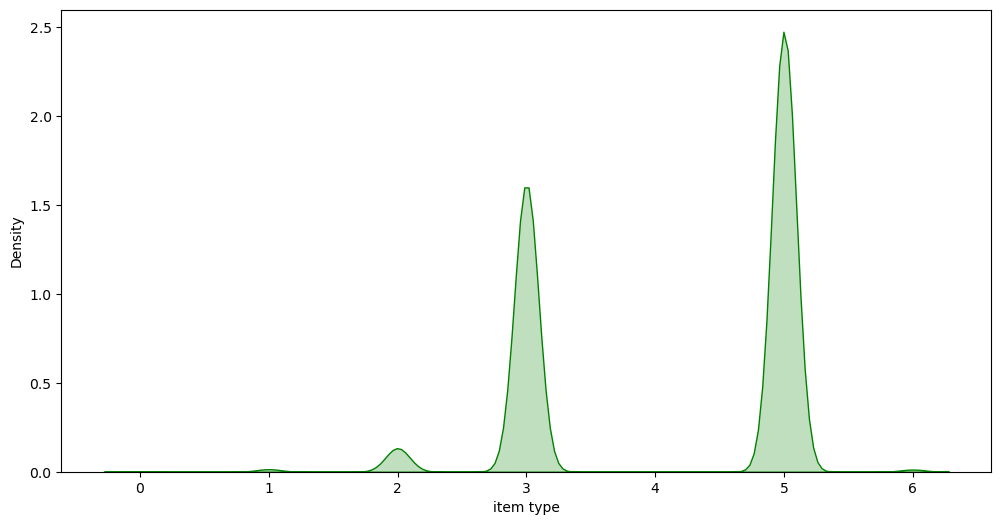

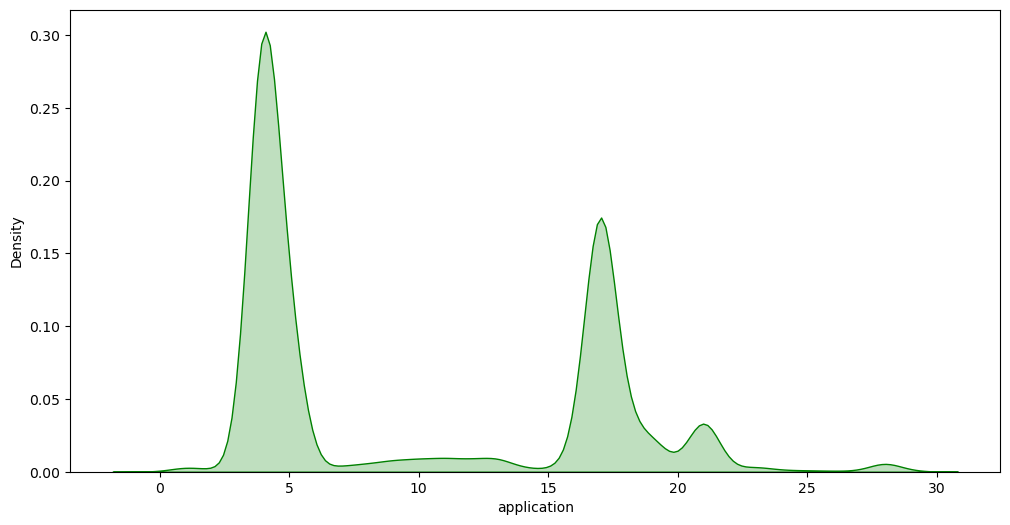

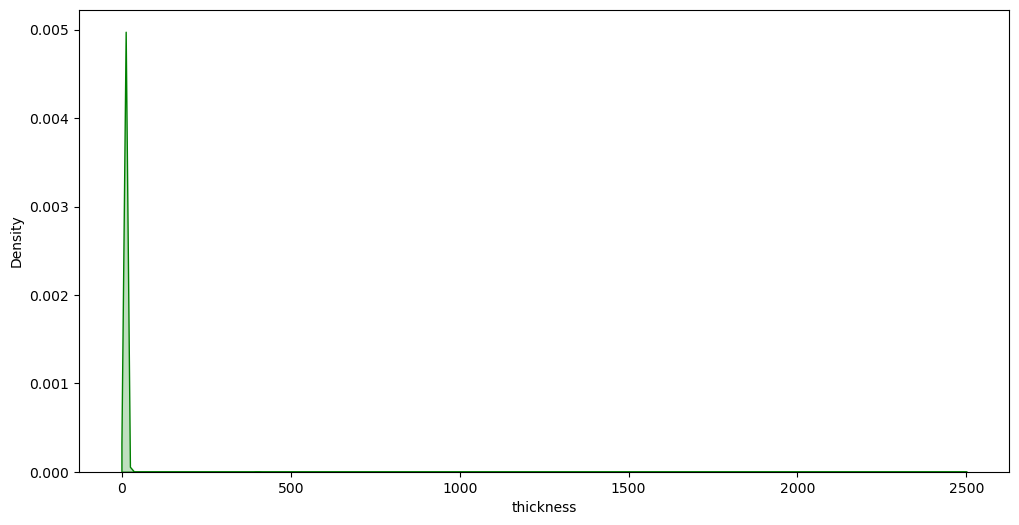

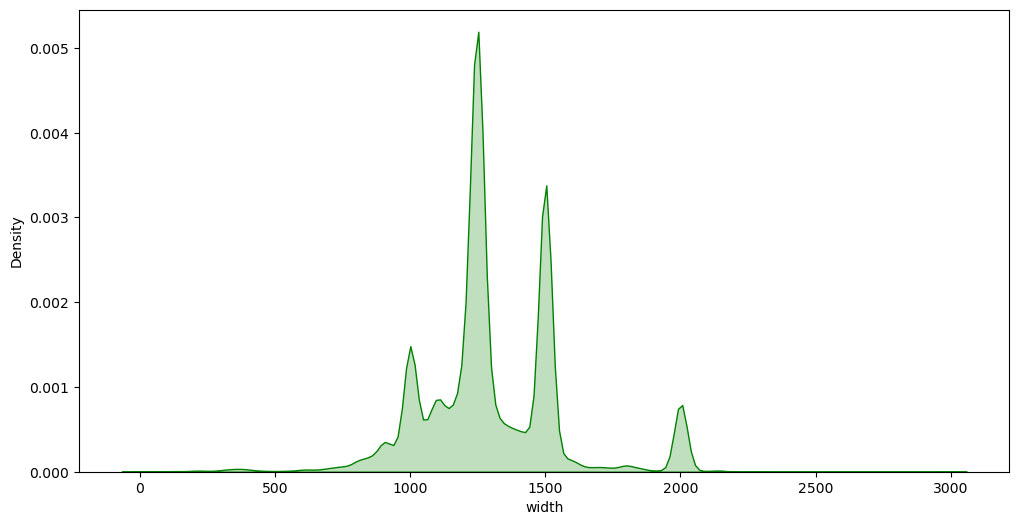

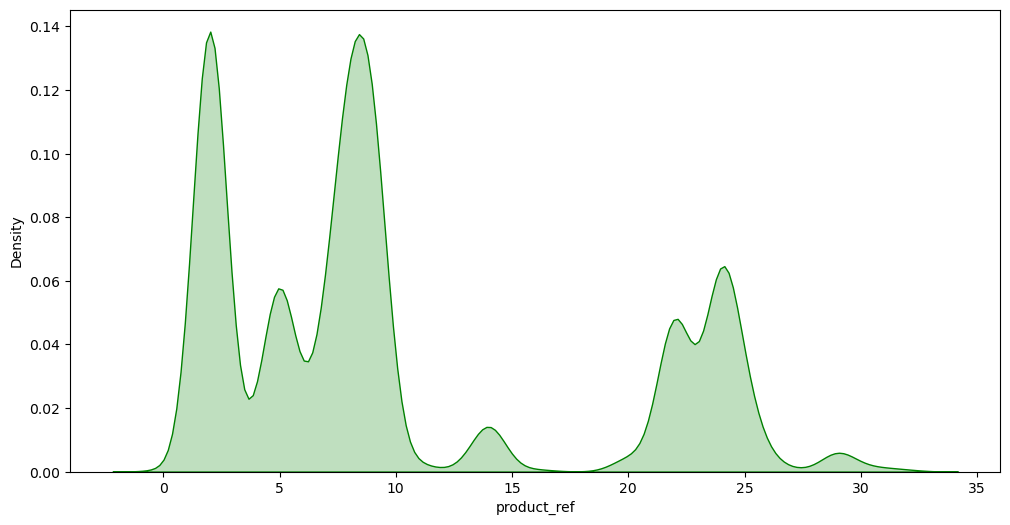

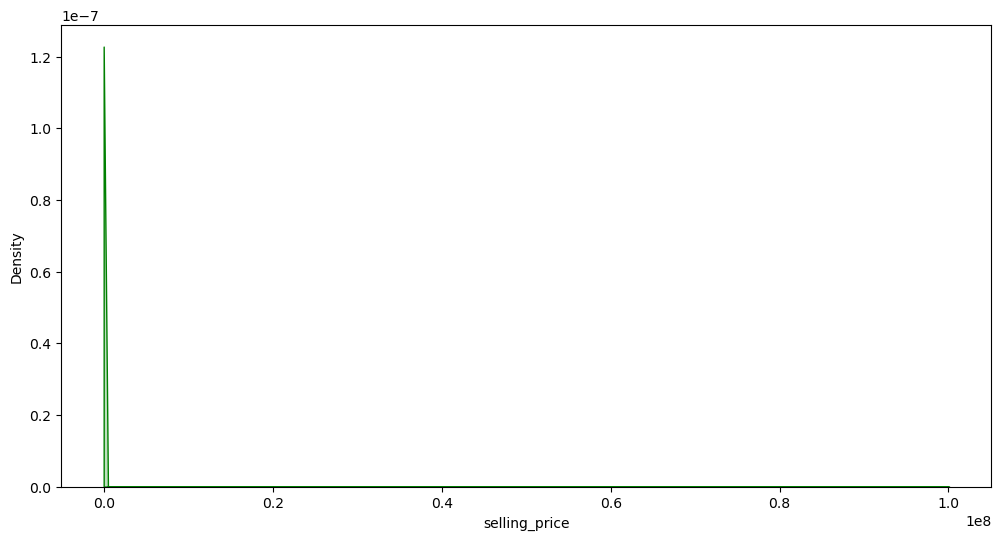

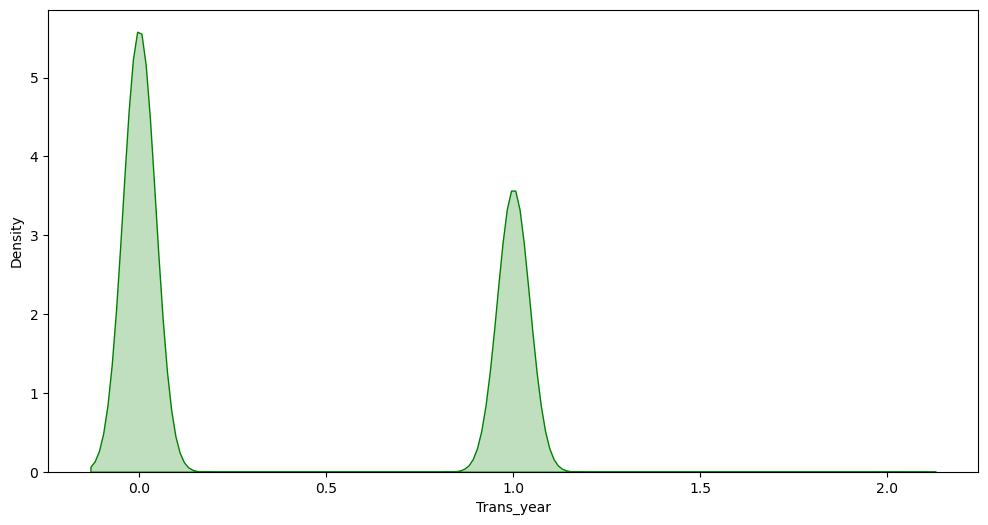

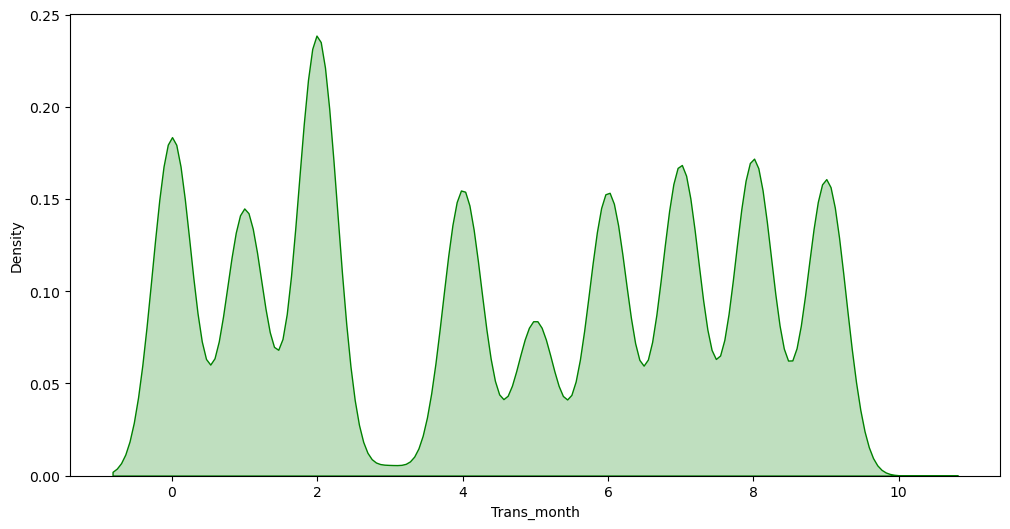

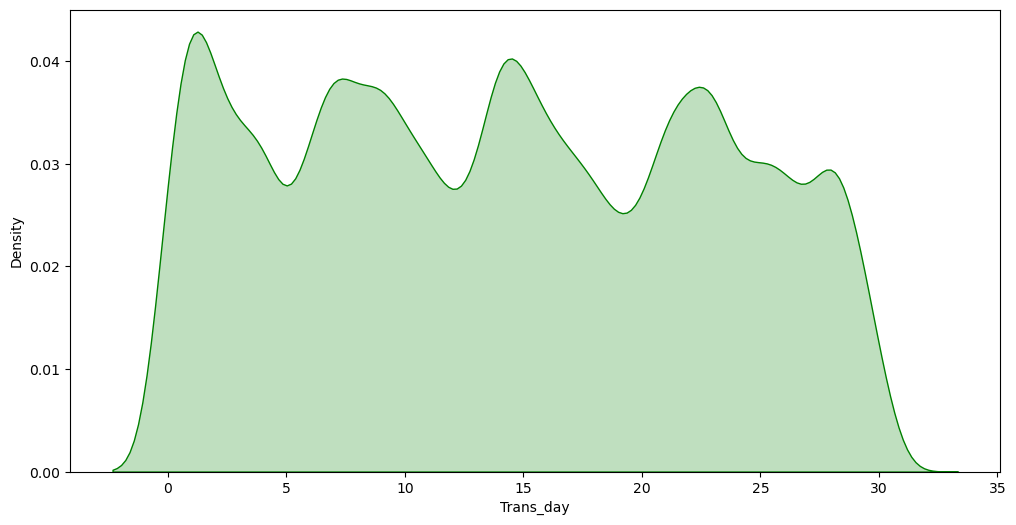

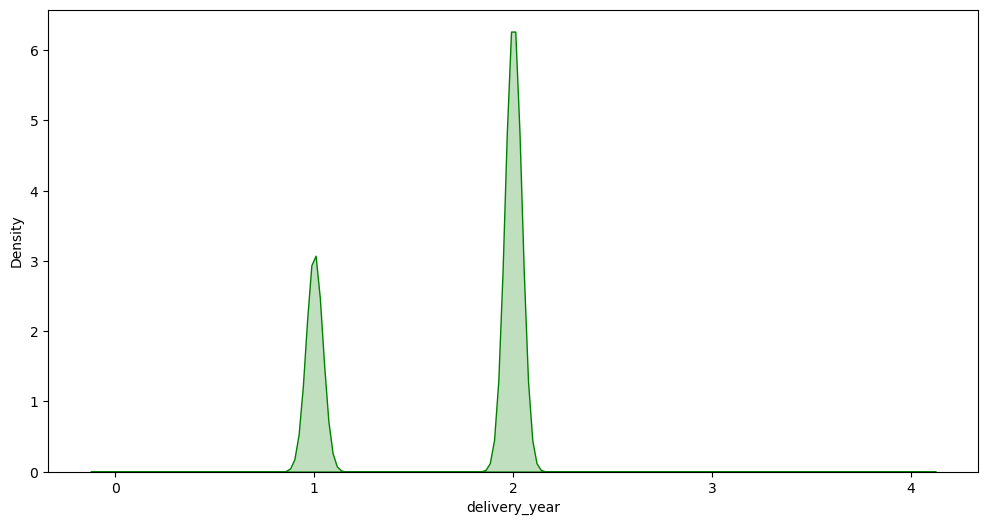

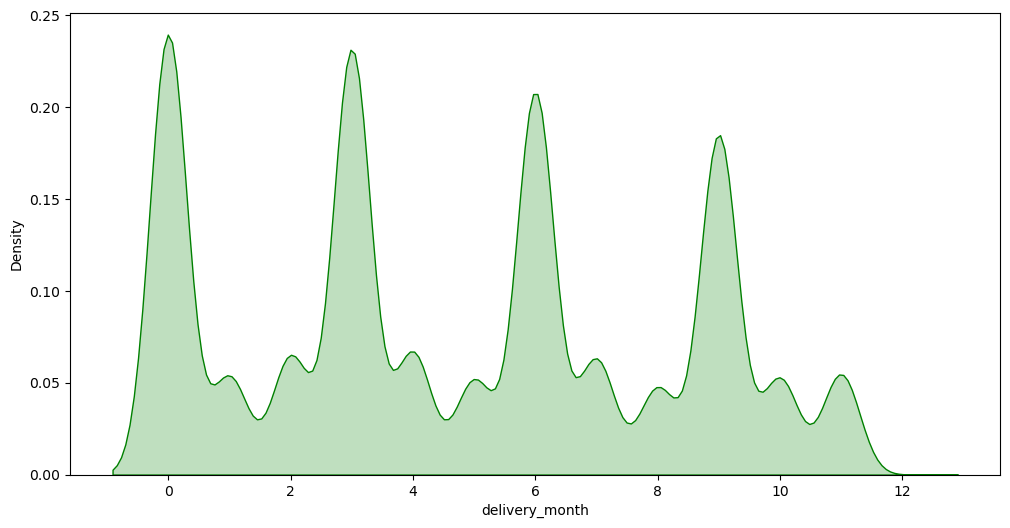

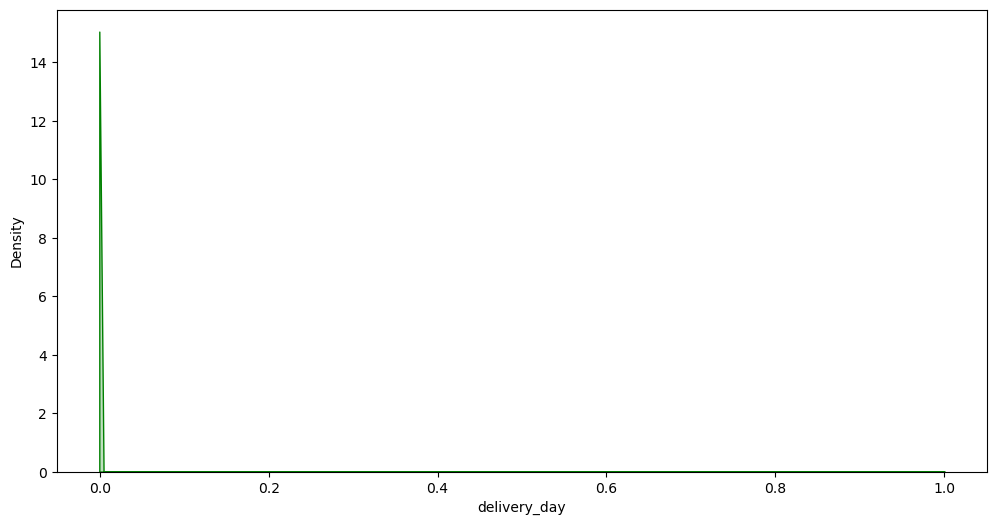

In [140]:
for i in data.columns:
    plt.figure(figsize=(12,6))
    sns.kdeplot(data[i], fill= True, color= 'g')

<AxesSubplot:>

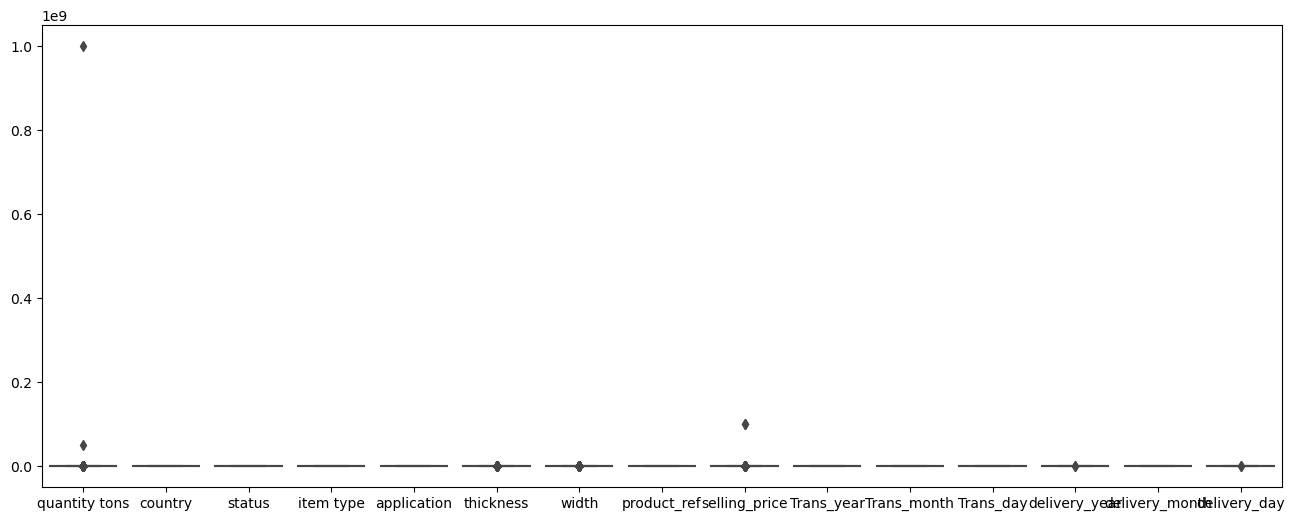

In [141]:
plt.figure(figsize=(16,6))
sns.boxplot(data = data)

In [142]:
# The box plot and kde plot looks fine

In [161]:
data.dropna(inplace=True)

## Model Building

In [188]:
data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'Trans_year',
       'Trans_month', 'Trans_day', 'delivery_year', 'delivery_month',
       'delivery_day'],
      dtype='object')

In [212]:
X = data.drop(['status','selling_price'], axis=1)
Y = data['selling_price']

In [224]:
X

,quantity tons,country,item type,application,thickness,width,product_ref,Trans_year,Trans_month,Trans_day,delivery_year,delivery_month,delivery_day
0,54.151139,3,5,4,2.00,1500.0,24,1,3,0,2,6,0
1,768.024839,0,5,17,0.80,1210.0,22,1,3,0,2,3,0
2,386.127949,4,6,12,0.38,952.0,5,1,3,0,2,0,0
3,202.411065,5,3,21,2.30,1317.0,22,1,3,0,2,0,0
4,785.526262,3,5,4,4.00,2000.0,8,1,3,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,0,5,17,0.96,1220.0,9,0,4,1,1,6,0
181669,208.086469,0,5,17,0.95,1500.0,9,0,4,1,1,6,0
181670,4.235594,0,5,17,0.71,1250.0,9,0,4,1,1,6,0
181671,-2000.000000,0,5,17,0.85,1250.0,9,0,4,1,1,6,0


In [213]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_x  = ss.fit_transform(X.values)
y = Y.values

In [218]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rf = RandomForestRegressor()
rf.fit(scaled_x,y)
mean_absolute_error(y,rf.predict(scaled_x))

646.86241351751

In [219]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
gb = GradientBoostingRegressor()
gb.fit(scaled_x,y)
mean_absolute_error(y,gb.predict(scaled_x))

2579.897745651614

In [220]:
# Gradient Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
ab = AdaBoostRegressor()
ab.fit(scaled_x,y)
mean_absolute_error(y,ab.predict(scaled_x))

180.6182355884131

In [221]:
# xgboost
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
xb = xgb.XGBRegressor()
xb.fit(scaled_x,y)
mean_absolute_error(y,xb.predict(scaled_x))

175.38859534318487

In [ ]:
# As the Gradient Boosting algorithm is giving the least MAE, We will build the model with Gradient Boosting

In [182]:
import pickle
with open('model.pkl', 'wb') as m:
    pickle.dump(gb, m)

In [185]:
data.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'Trans_year',
       'Trans_month', 'Trans_day', 'delivery_year', 'delivery_month',
       'delivery_day'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_x_train  = ss.fit_transform(x_train)
scaled_x_test = ss.fit_transform(x_test)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
gb = GradientBoostingRegressor()
gb.fit(scaled_x_train,y_train)
mean_absolute_error(y_test,gb.predict(scaled_x_test))

In [194]:
x_train.shape

(127144, 13)

In [216]:
y

array([ 854.  , 1047.  ,  644.33, ...,  619.  ,  601.  ,  607.  ])

In [184]:
scaled_x_train.shape

(127144, 13)

In [222]:
from pycaret.regression import *

setup( scaled_x ,target=y)

,Description,Value
0,Session id,4346
1,Target,target
2,Target type,Regression
3,Original data shape,"(181635, 14)"
4,Transformed data shape,"(181635, 14)"
5,Transformed train set shape,"(127144, 14)"
6,Transformed test set shape,"(54491, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [223]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1686.7480,157300990394.7520,177573.3435,0.2557,0.5405,1.0650,0.4330
par,Passive Aggressive Regressor,1688.8195,157300886303.5589,177574.9486,0.2445,0.5421,1.0696,0.1240
dummy,Dummy Regressor,3147.7641,157301179585.6500,178793.2750,-40.6175,1.2689,4.5949,0.0470
br,Bayesian Ridge,3385.1992,157302613651.7000,179235.3909,-71.2403,1.3996,5.1610,0.1010
omp,Orthogonal Matching Pursuit,3758.6283,157305375770.9000,179957.7330,-137.1178,1.5021,5.3310,0.0500
en,Elastic Net,4235.5583,157308110342.5000,180252.4702,-170.6771,1.5586,6.8029,0.0620
llar,Lasso Least Angle Regression,6339.6504,157327326231.2000,182730.6870,-598.4776,1.8985,11.7632,0.0480
lasso,Lasso Regression,6339.6087,157327332682.8000,182730.6840,-598.4830,1.8985,11.7630,0.3500
ridge,Ridge Regression,6346.6650,157327362472.0000,182739.6910,-600.5504,1.8988,11.7802,0.0570
lar,Least Angle Regression,6347.4771,157327383123.2000,182740.7399,-600.7854,1.8988,11.7822,0.0490


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

HuberRegressor()

In [148]:
# 7 - WON
# 1- LOST
# 2 - Not lost for AM
# 5 - Revised
# 6 - To be approved
# 0 - Draft
# 4 - Offered
# 3 - Offerable
#8 -Wonderful               1